# Discrete Wavelet Transformation: Part 1 Data Summarization; Part 2 Similarity Search

# Part 1: Time Series Data Summarization

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pywt # python library for wavelet transformation

## Time Series Compression and Reconstruction

In [2]:
# Compress 'x' i times and get a [x.size / 2**i] size data
# e.g. using com_iterative(x, 3) on x which contains 256 float numbers,
#      we'll have a compressed [256 / 2**3] = 32 float numbers
def com_iterative(x, i):
    for k in range(i):
        compressed_x, _ = pywt.dwt(x, 'db1')
        x = compressed_x
    return x
# reconstruction of data set 'y' to [y.original_size * 2**i]
def rec_iterative(y, i):
    tmp = y
    for k in range(i):
        reconstructed_y = pywt.idwt(tmp, None, 'db1')
        tmp = reconstructed_y
    return reconstructed_y

### Interfaces to facilitate using compression/reconstruction functions above

In [3]:
# Interface functions to encode/decode easily
def compress_to_size(x, size):
    if size == 128 or size == 64 or size == 32:
        return com_iterative(x, int(math.log(x.shape[0]/size, 2)))
    else:
        print("compress_to_size(x,size): size is not valid.")
        import os
        os.system('pause')

def decompress256(y, size):
    return rec_iterative(y, int(math.log(256/y.shape[0], 2)))

### Interface to facilitate euclidean distance calculation

In [4]:
# An interface to calculate euclidean distance between 2 signals
def euc_dist(x,y):
    return float(np.linalg.norm(x - y))

# Calculate RMSE
from sklearn.metrics import mean_squared_error
from math import sqrt
def rmse(x,y):
    return sqrt(mean_squared_error(x, y))

# Test of Part 1: Compression and Reconstruction with given 50k time_series

## Load 50k time_series (synthetic and synthetic)

In [5]:
import struct
filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_seismic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

## Data compression and reconstruction for 50k seismic time_series

In [6]:
# Following code is to compress and reconstruct seismic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_seismic = []
errorList_64_seismic = []
errorList_32_seismic = []

data_size = 50000
for i in range(data_size):
    x = time_series_seismic[i,] # x contains 256 float numbers
    
    # 256 -> 128 -> 256
    resized_128 = compress_to_size(x, 128)
    
    scale_n = 127 / max(abs(np.amax(resized_128)), abs(np.amin(resized_128)))
    resized_128 = np.multiply(resized_128, scale_n).round().astype(np.int8)
    resized_128 = np.multiply(resized_128, 1/scale_n).astype(np.float32)
    
    reconstructed_128 = decompress256(resized_128, 128)
    errorList_128_seismic.append(rmse(x, reconstructed_128))
    
    # 256 -> 64 -> 256
    resized_64 = compress_to_size(x, 64)
    
    scale_n = 127 / max(abs(np.amax(resized_64)), abs(np.amin(resized_64)))
    resized_64 = np.multiply(resized_64, scale_n).round().astype(np.int8)
    resized_64 = np.multiply(resized_64, 1/scale_n).astype(np.float32)
    
    reconstructed_64 = decompress256(resized_64, 64)
    errorList_64_seismic.append(rmse(x, reconstructed_64))
    
    # 256 -> 32 -> 256
    resized_32 = compress_to_size(x, 32)
    
    scale_n = 127 / max(abs(np.amax(resized_32)), abs(np.amin(resized_32)))
    resized_32 = np.multiply(resized_32, scale_n).round().astype(np.int8)
    resized_32 = np.multiply(resized_32, 1/scale_n).astype(np.float32)
    
    reconstructed_32 = decompress256(resized_32, 32)
    errorList_32_seismic.append(rmse(x, reconstructed_32))

## Data compression and reconstruction for 50k synthetic time_series

In [7]:
# Following code is to compress and reconstruct synthetic data
# every time serie will be compressed from 256 to 128/64/32
# then the compressed data will be "enlarged" from 128/64/32 to 256

# Initialize variables to record reconstruction error for 50k time_series
errorList_128_synthetic = []
errorList_64_synthetic = []
errorList_32_synthetic = []

data_size = 50000
for i in range(data_size):
    x = time_series_synthetic[i,] # x contains 256 float numbers
    
    # 256 -> 128 -> 256
    resized_128 = compress_to_size(x, 128)
    
    scale_n = 127 / max(abs(np.amax(resized_128)), abs(np.amin(resized_128)))
    resized_128 = np.multiply(resized_128, scale_n).round().astype(np.int8)
    resized_128 = np.multiply(resized_128, 1/scale_n).astype(np.float32)
    
    reconstructed_128 = decompress256(resized_128, 128)
    errorList_128_synthetic.append(rmse(x, reconstructed_128))
    
    # 256 -> 64 -> 256
    resized_64 = compress_to_size(x, 64)
    
    scale_n = 127 / max(abs(np.amax(resized_64)), abs(np.amin(resized_64)))
    resized_64 = np.multiply(resized_64, scale_n).round().astype(np.int8)
    resized_64 = np.multiply(resized_64, 1/scale_n).astype(np.float32)
    
    reconstructed_64 = decompress256(resized_64, 64)
    errorList_64_synthetic.append(rmse(x, reconstructed_64))
    
    # 256 -> 32 -> 256
    resized_32 = compress_to_size(x, 32)
    
    scale_n = 127 / max(abs(np.amax(resized_32)), abs(np.amin(resized_32)))
    resized_32 = np.multiply(resized_32, scale_n).round().astype(np.int8)
    resized_32 = np.multiply(resized_32, 1/scale_n).astype(np.float32)
    
    reconstructed_32 = decompress256(resized_32, 32)
    errorList_32_synthetic.append(rmse(x, reconstructed_32))

# Evaluate reconstruction error

In [8]:
def summarize_data(x):
    print("Average:", np.mean(x), " Mean:", np.median(x), " Max:", np.max(x), " Min:", np.min(x), "\n")

### 50k seismic

In [9]:
# Reconstruction error for 50k seismic time_series
print("Reconstruction Error of 50k seismic time series: 128 -> 256")
summarize_data(errorList_128_seismic)
print("Reconstruction Error of 50k seismic time series: 64 -> 256")
summarize_data(errorList_64_seismic)
print("Reconstruction Error of 50k seismic time series: 32 -> 256")
summarize_data(errorList_32_seismic)

Reconstruction Error of 50k seismic time series: 128 -> 256
Average: 0.7911755191003836  Mean: 0.8041553648514881  Max: 0.917766395379416  Min: 0.22804855665049278 

Reconstruction Error of 50k seismic time series: 64 -> 256
Average: 0.9638444495610963  Mean: 0.9694821364976058  Max: 0.9906887530864238  Min: 0.4361245813732806 

Reconstruction Error of 50k seismic time series: 32 -> 256
Average: 0.9880896015459923  Mean: 0.9903720964260271  Max: 0.9988960726360026  Min: 0.6447179871605736 



### 50k synthetic

In [10]:
# Reconstruction error for 50k synthetic time_series
print("Reconstruction Error of 50k synthetic time series: 128 -> 256")
summarize_data(errorList_128_synthetic)
print("Reconstruction Error of 50k synthetic time series: 64 -> 256")
summarize_data(errorList_64_synthetic)
print("Reconstruction Error of 50k synthetic time series: 32 -> 256")
summarize_data(errorList_32_synthetic)

Reconstruction Error of 50k synthetic time series: 128 -> 256
Average: 0.09549357879337712  Mean: 0.09037932432925012  Max: 0.2867153838455777  Min: 0.02231757716279205 

Reconstruction Error of 50k synthetic time series: 64 -> 256
Average: 0.15049778066084663  Mean: 0.1427413408803307  Max: 0.45377931090293594  Min: 0.03928585335779355 

Reconstruction Error of 50k synthetic time series: 32 -> 256
Average: 0.21699795276600323  Mean: 0.2064731265770025  Max: 0.6278301599365023  Min: 0.05862112782319518 



## Visualize reconstruction errors of 50k time series with Boxplot

In [11]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

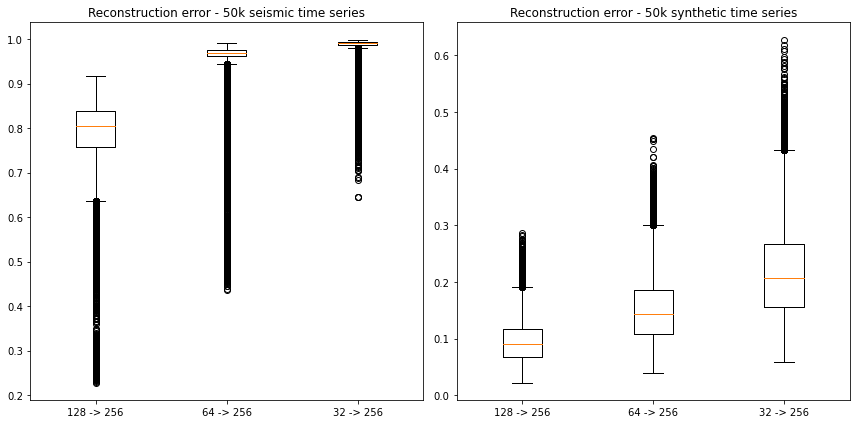

In [12]:
plt.subplot(1,2,1)
plt.boxplot([errorList_128_seismic, errorList_64_seismic, errorList_32_seismic])
plt.title('Reconstruction error - 50k seismic time series')
plt.xticks([1, 2, 3], ['128 -> 256', '64 -> 256', '32 -> 256'])

plt.subplot(1,2,2)
plt.boxplot([errorList_128_synthetic, errorList_64_synthetic, errorList_32_synthetic])
plt.title('Reconstruction error - 50k synthetic time series')
plt.xticks([1, 2, 3], ['128 -> 256', '64 -> 256', '32 -> 256'])

plt.tight_layout()
plt.show

# Example: Visualization of Data Compression and Reconstruction

In [13]:
plt.rcParams['figure.figsize'] = [15, 7.5]

<function matplotlib.pyplot.show(*args, **kw)>

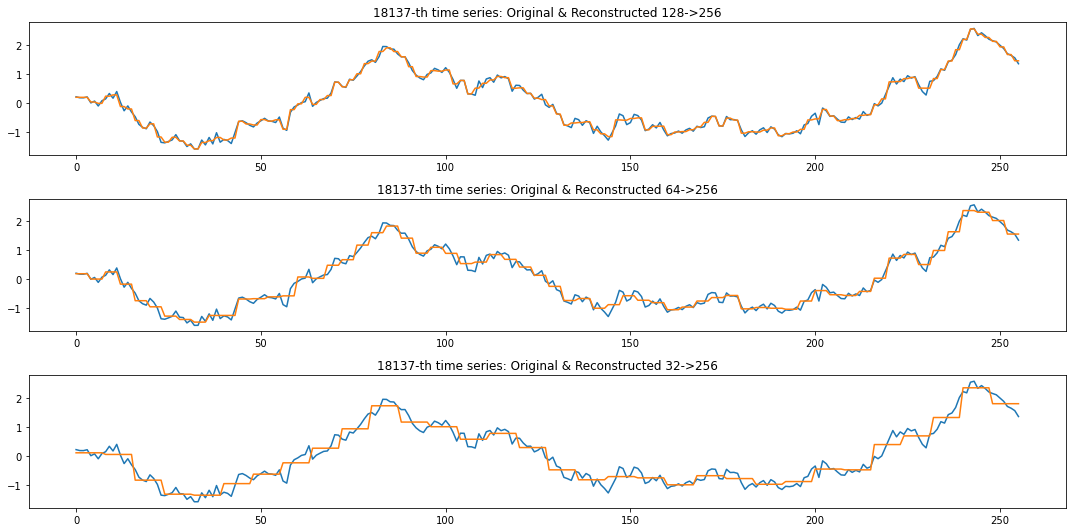

In [14]:
import random
i = random.randrange(0,49999)
t = range(256)
x = time_series_synthetic[i,]
rec_128 = decompress256(compress_to_size(x, 128), 128)
rec_64 = decompress256(compress_to_size(x, 64), 64)
rec_32 = decompress256(compress_to_size(x, 32), 32)

plt.subplot(3,1,1)
plt.plot(t, x, t, rec_128)
plt.title(str(i)+'-th time series: Original & Reconstructed 128->256')

plt.subplot(3,1,2)
plt.plot(t, x, t, rec_64)
plt.title(str(i)+'-th time series: Original & Reconstructed 64->256')

plt.subplot(3,1,3)
plt.plot(t, x, t, rec_32)
plt.title(str(i)+'-th time series: Original & Reconstructed 32->256')

plt.tight_layout()
plt.show

# Part 2: Similarity Search by using Euclidean Distance (with Data Summarization)

## Function: Similarity Search WITH Data Summarization

In [15]:
def similarity_euclidean_compression(q, time_series, compress_size):
    
    # Compress the query signal to a smaller time series which contains "compress_size" float numbers
    q_com = compress_to_size(q, compress_size)

    D_closest_com = 10000.0  # Initialize closest distance for compressed time series as infinitiy
    D_closest_256 = 10000.0  # Initialize closest distance for original time series as infinitiy
    index_closest = 0        # Initialize closest time series' index as 0
    pruning_count = 0        # Initialize pruning count as 0
    
    for i in range(time_series.shape[0]): # Loop for all time_series
        x = time_series[i, ]
        x_com = compress_to_size(x, compress_size)
        
        dist_com = euc_dist(q_com, x_com) # Calculate euclidean distance between compressed time series
        if D_closest_com > dist_com:
            
            dist_256 = euc_dist(q, x) # Calculate the euclidean distance between original time series
            if D_closest_256 > dist_256:
                
                # Memorization
                D_closest_com = dist_com
                D_closest_256 = dist_256
                index_closest = i
        
        # When euclidean distance between compressed time series is bigger
        else:
            # The time series is pruned, we count all pruned times
            pruning_count += 1
            
    # Return index, distance and pruning times for this similarity search
    return index_closest, D_closest_256, pruning_count

## Function: Similarity Search WITHOUT Data Summarization

In [16]:
def similarity_euclidean_no_compression(q, time_series):

    D_closest_256 = 10000.0  # Initialize original minimum distance as infinitiy
    index_closest = 0        # Initialize closest time series' index as 0
    
    for i in range(time_series.shape[0]): # Loop for all time_series
        x = time_series[i, ]
        dist_256 = euc_dist(q, x) # Calculate the euclidean distance between original time series
        
        if D_closest_256 > dist_256:
            D_closest_256 = dist_256
            index_closest = i
            
    # Return index, distance for this similarity search
    return index_closest, D_closest_256

# Test 2: Similarity Search WITH and WITHOUT Data Summarization

## Load 100 query time_series and 50k time_series (synthetic and synthetic)

In [17]:
import struct
filename_seismic_query = 'seismic-query_size100_len256_znorm.bin'
with open(filename_seismic_query, 'rb') as in_file:
    time_series_seismic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_synthetic_query = 'synthetic-query_size100_len256_znorm.bin'
with open(filename_synthetic_query, 'rb') as in_file:
    time_series_synthetic_query = np.array(struct.unpack('f' * 100 * 256, in_file.read())).reshape(-1,256)

filename_seismic = 'seismic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_seismic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

filename_synthetic = 'synthetic_size50k_len256_znorm.bin'
with open(filename_synthetic, 'rb') as in_file:
    time_series_synthetic = np.array(struct.unpack('f' * 50000 * 256, in_file.read())).reshape(-1,256)

## For every query time series, find a closest time series from 50k

### Initialize memorization variables

In [18]:
distSimilarity_128_seismic = []
distSimilarity_64_seismic = []
distSimilarity_32_seismic = []
distSimilarity_seismic = []

indexSimilarity_128_seismic = []
indexSimilarity_64_seismic = []
indexSimilarity_32_seismic = []
indexSimilarity_seismic = []

pruning_count_128_seismic = 0
pruning_count_64_seismic = 0
pruning_count_32_seismic = 0

distSimilarity_128_synthetic = []
distSimilarity_64_synthetic = []
distSimilarity_32_synthetic = []
distSimilarity_synthetic = []

indexSimilarity_128_synthetic = []
indexSimilarity_64_synthetic = []
indexSimilarity_32_synthetic = []
indexSimilarity_synthetic = []

pruning_count_128_synthetic = 0
pruning_count_64_synthetic = 0
pruning_count_32_synthetic = 0

## Similarity search WITH data summarization(128/64/32) and WITHOUT data summarization

### 100 seismic queries

In [19]:
query_size = 100
for i in range(query_size):
    
    # Seismic
    q = time_series_seismic_query[i,]
    # 128
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 128)
    distSimilarity_128_seismic.append(dist)
    indexSimilarity_128_seismic.append(idx)
    pruning_count_128_seismic += pruning_count
    # 64
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 64)
    distSimilarity_64_seismic.append(dist)
    indexSimilarity_64_seismic.append(idx)
    pruning_count_64_seismic += pruning_count
    # 32
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_seismic, 32)
    distSimilarity_32_seismic.append(dist)
    indexSimilarity_32_seismic.append(idx)
    pruning_count_32_seismic += pruning_count
    # without data summarization
    idx_no_com, dist_no_com = similarity_euclidean_no_compression(q, time_series_seismic)
    distSimilarity_seismic.append(dist_no_com)
    indexSimilarity_seismic.append(idx_no_com)

### 100 synthetic queries

In [20]:
query_size = 100
for i in range(query_size):
    
    # Synthetic
    q = time_series_synthetic_query[i,]
    # 128
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 128)
    distSimilarity_128_synthetic.append(dist)
    indexSimilarity_128_synthetic.append(idx)
    pruning_count_128_synthetic += pruning_count
    # 64
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 64)
    distSimilarity_64_synthetic.append(dist)
    indexSimilarity_64_synthetic.append(idx)
    pruning_count_64_synthetic += pruning_count
    # 32
    idx, dist, pruning_count = similarity_euclidean_compression(q, time_series_synthetic, 32)
    distSimilarity_32_synthetic.append(dist)
    indexSimilarity_32_synthetic.append(idx)
    pruning_count_32_synthetic += pruning_count
    # without data summarization
    idx_no_com, dist_no_com = similarity_euclidean_no_compression(q, time_series_synthetic)
    distSimilarity_synthetic.append(dist_no_com)
    indexSimilarity_synthetic.append(idx_no_com)

## Pruning ratio

In [21]:
size = 100
print("Similarity search for seismic time series:")
print("Average pruning ratio 128/64/32: ", pruning_count_128_seismic/size/50000, pruning_count_64_seismic/size/50000, pruning_count_32_seismic/size/50000)

print("Similarity search for synthetic time series:")
print("Average pruning ratio 128/64/32: ", pruning_count_128_synthetic/size/50000, pruning_count_64_synthetic/size/50000, pruning_count_32_synthetic/size/50000)

Similarity search for seismic time series:
Average pruning ratio 128/64/32:  0.9994025999999999 0.9973038000000001 0.9962553999999999
Similarity search for synthetic time series:
Average pruning ratio 128/64/32:  0.9995575999999999 0.9985626 0.997104


# Comparison of similarity search error: with data summarization (128/64/32) and without data summarization

In [22]:
print("Seismic time series: ")
print("---------------------")
print("Similarity search error - with data summarization (128)")
summarize_data(distSimilarity_128_seismic)
print("Similarity search error - with data summarization (64)")
summarize_data(distSimilarity_64_seismic)
print("Similarity search error - with data summarization (32)")
summarize_data(distSimilarity_32_seismic)
print("Similarity search error - without data summarization")
summarize_data(distSimilarity_seismic)

Seismic time series: 
---------------------
Similarity search error - with data summarization (128)
Average: 21.849259450201956  Mean: 21.858988938367673  Max: 22.120940337624127  Min: 21.42455570887258 

Similarity search error - with data summarization (64)
Average: 21.93475024208273  Mean: 21.929152747261544  Max: 22.31691895441123  Min: 21.42455570887258 

Similarity search error - with data summarization (32)
Average: 21.920979290658394  Mean: 21.933677575742188  Max: 22.293412469048207  Min: 21.42455570887258 

Similarity search error - without data summarization
Average: 21.784462755940172  Mean: 21.79641961257886  Max: 21.98575356715846  Min: 21.42455570887258 



In [23]:
print("Synthetic time series: ")
print("---------------------")
print("Similarity search error - with data summarization (128)")
summarize_data(distSimilarity_128_synthetic)
print("Similarity search error - with data summarization (64)")
summarize_data(distSimilarity_64_synthetic)
print("Similarity search error - with data summarization (32)")
summarize_data(distSimilarity_32_synthetic)
print("Similarity search error - without data summarization")
summarize_data(distSimilarity_synthetic)

Synthetic time series: 
---------------------
Similarity search error - with data summarization (128)
Average: 21.603085331217734  Mean: 21.649007690237212  Max: 22.546022680050353  Min: 20.78892850203825 

Similarity search error - with data summarization (64)
Average: 21.688790643165117  Mean: 21.720450726225263  Max: 22.57054120069607  Min: 20.99085046290447 

Similarity search error - with data summarization (32)
Average: 21.707501850501075  Mean: 21.731053618237404  Max: 22.774902582460207  Min: 20.99085046290447 

Similarity search error - without data summarization
Average: 21.550549634946957  Mean: 21.591055321631426  Max: 22.375358757892045  Min: 20.78892850203825 



In [24]:
plt.rcParams['figure.figsize'] = [12, 6]

<function matplotlib.pyplot.show(*args, **kw)>

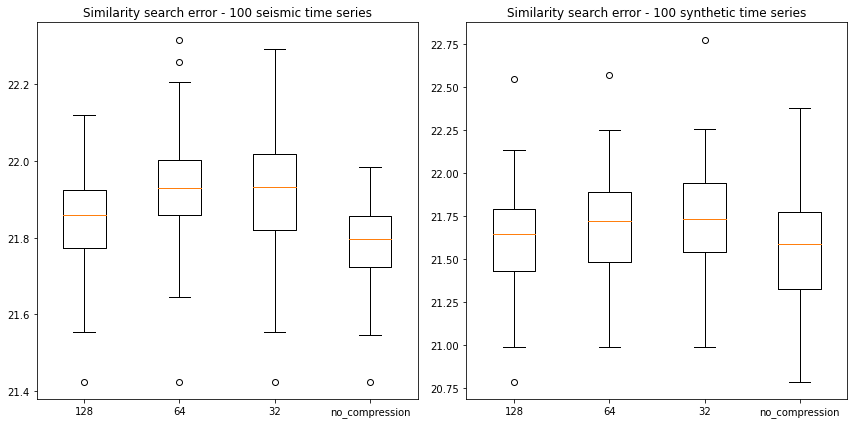

In [25]:
plt.subplot(1,2,1)
plt.boxplot([distSimilarity_128_seismic, distSimilarity_64_seismic, distSimilarity_32_seismic, distSimilarity_seismic])
plt.title('Similarity search error - 100 seismic time series')
plt.xticks([1, 2, 3, 4], ['128', '64', '32', 'no_compression'])

plt.subplot(1,2,2)
plt.boxplot([distSimilarity_128_synthetic, distSimilarity_64_synthetic, distSimilarity_32_synthetic, distSimilarity_synthetic])
plt.title('Similarity search error - 100 synthetic time series')
plt.xticks([1, 2, 3, 4], ['128', '64', '32', 'no_compression'])

plt.tight_layout()
plt.show

## Visualize found closest signals WITH and WITHOUT data summarization - Seismic

In [26]:
plt.rcParams['figure.figsize'] = [15, 10]

<function matplotlib.pyplot.show(*args, **kw)>

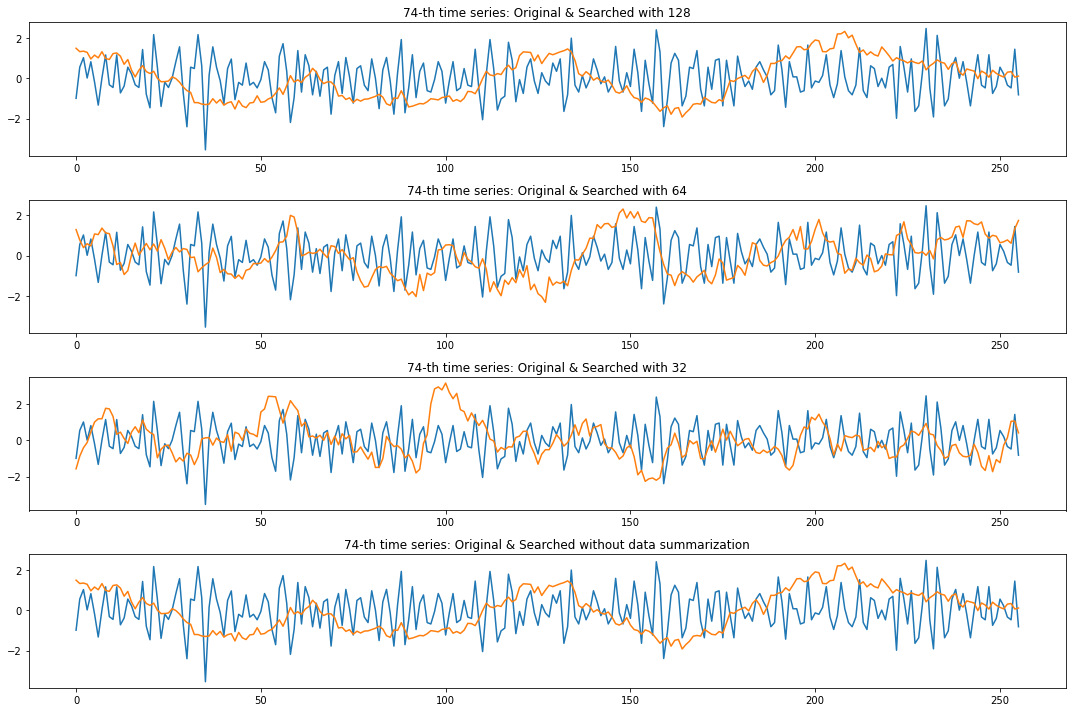

In [27]:
import random
i = random.randrange(0,99)
t = range(256)
x = time_series_synthetic_query[i,]

plt.subplot(4,1,1)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_128_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 128')

plt.subplot(4,1,2)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_64_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 64')

plt.subplot(4,1,3)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_32_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 32')

plt.subplot(4,1,4)
plt.plot(t, x, t, time_series_seismic[indexSimilarity_seismic[i],])
plt.title(str(i)+'-th time series: Original & Searched without data summarization')

plt.tight_layout()
plt.show

## Visualize found closest signals WITH and WITHOUT data summarization - Synthetic

In [28]:
plt.rcParams['figure.figsize'] = [15, 10]

<function matplotlib.pyplot.show(*args, **kw)>

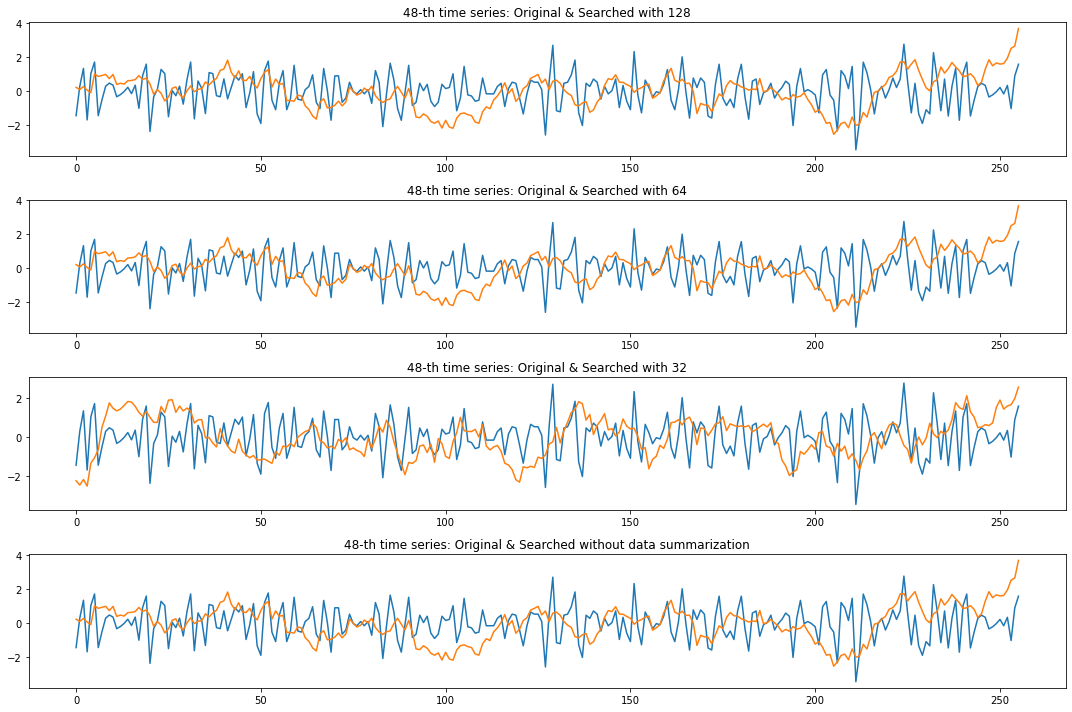

In [29]:
import random
i = random.randrange(0,99)
t = range(256)
x = time_series_synthetic_query[i,]

plt.subplot(4,1,1)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_128_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 128')

plt.subplot(4,1,2)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_64_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 64')

plt.subplot(4,1,3)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_32_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched with 32')

plt.subplot(4,1,4)
plt.plot(t, x, t, time_series_synthetic[indexSimilarity_synthetic[i],])
plt.title(str(i)+'-th time series: Original & Searched without data summarization')

plt.tight_layout()
plt.show